In [1]:
# import modules
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from IPython.display import display
from sklearn.model_selection import GroupKFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import scipy

In [2]:
train = pd.read_csv("../input/tabular-playground-series-apr-2022/train.csv")
test = pd.read_csv("../input/tabular-playground-series-apr-2022/test.csv")
submission = pd.read_csv("../input/tabular-playground-series-apr-2022/sample_submission.csv")
labels = pd.read_csv("../input/tabular-playground-series-apr-2022/train_labels.csv")

In [3]:
train.head()

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,0,47,0,-0.196291,0.112395,1.0,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492
1,0,47,1,-0.447450,0.134454,1.0,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390
2,0,47,2,0.326893,-0.694328,1.0,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147
3,0,47,3,0.523184,0.751050,1.0,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241
4,0,47,4,0.272025,1.074580,1.0,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359


In [4]:
# first 60 seconds
train[train['sequence']==0]

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,0,47,0,-0.196291,0.112395,1.000000,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492
1,0,47,1,-0.447450,0.134454,1.000000,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390
2,0,47,2,0.326893,-0.694328,1.000000,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147
3,0,47,3,0.523184,0.751050,1.000000,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241
4,0,47,4,0.272025,1.074580,1.000000,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359
5,0,47,5,-1.073416,-1.714286,1.000000,-1.492920,0.469736,0.713538,-1.792350,-1.082443,-0.5,0.314306,0.664594,-1.682099,-2.838448
6,0,47,6,0.350850,0.439076,1.000000,0.870796,-0.596964,0.923710,0.769581,0.666412,0.2,-0.723266,-1.691552,0.842593,1.849531
7,0,47,7,-0.304482,-0.379202,1.000000,-0.218584,-0.059983,-1.389678,-0.182149,-0.029771,0.1,-0.070809,-0.774024,-0.612140,3.300938
8,0,47,8,-0.216383,1.106092,1.000000,0.677876,-0.071718,-0.456993,0.296903,0.111450,0.6,-0.525289,-0.334069,1.751029,0.515772
9,0,47,9,0.303709,-1.744748,1.000000,-0.896460,-0.755221,-0.254301,-0.354281,-0.591603,0.0,0.151012,-0.268359,-2.033951,4.509378


In [5]:
len(train[train['subject'] == 47])

6240

In [6]:
train['subject'].unique()

array([ 47,  66, 542, 437, 510, 246, 520,  78, 526,   4, 508, 651, 123,
       100,  99, 381, 511, 263, 543, 239, 317, 489,  48, 357, 333, 232,
       623, 661, 290, 582, 465, 207, 443, 394, 573, 579, 365,  35,  82,
       164, 322, 235, 138,  89,  70,  76, 346, 662, 107, 505, 479, 140,
       188,  59, 441, 596, 671, 426, 191, 330, 597, 392, 120, 297, 415,
       416, 420,  60, 438,  98, 487, 665, 358, 103, 590, 122, 256, 535,
       127, 146, 473,  71,  88,  41,  56, 352,  38, 198, 468, 460, 558,
       203, 196, 311, 496, 131, 491,  75, 408, 285, 422, 583, 553, 364,
       499, 141, 424, 229, 351, 374, 530, 598, 607, 222, 647, 310, 395,
       630, 476, 189, 454, 213, 431, 318, 166, 249,  42, 369, 125, 309,
       538, 197, 251,  44, 622,  72, 337, 209, 477, 359, 555,   2,  94,
       269,  52, 397, 480, 240, 185,  95, 559, 502, 386, 258, 545, 450,
        40, 463, 170, 294, 413, 667, 306, 341,  25,   1, 262, 646, 272,
       237, 613, 640,  91, 266, 338,   0, 144, 563, 417,  18, 10

In [7]:
test.head()

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,25968,684,0,2.427357,19.639706,1.0,-1.466372,-1.289973,-4.207928,2.486339,-2.493893,8.0,-1.123555,-1.673048,10.980453,0.419011
1,25968,684,1,-4.950541,-21.747899,1.0,0.983186,-0.569053,1.845924,-3.887978,1.727481,-2.9,0.395231,-0.882233,-1.871399,-0.008525
2,25968,684,2,1.136012,-10.756303,1.0,1.016814,0.964157,2.454749,0.312386,1.154198,-5.6,1.114162,1.525273,-11.584362,0.139812
3,25968,684,3,0.806028,6.504202,1.0,-0.179646,0.969221,-1.035153,-0.457195,0.254962,-2.7,-0.588873,0.608761,-4.241770,-0.462916
4,25968,684,4,1.288253,5.552521,1.0,-0.493805,-1.036124,-1.126402,2.008197,-0.730534,0.0,0.899566,-1.259615,-0.472222,-0.121483


In [8]:
labels.head()

,sequence,state
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


Text(0.5, 1.0, 'Correlation Heatmap for Train Dataset')

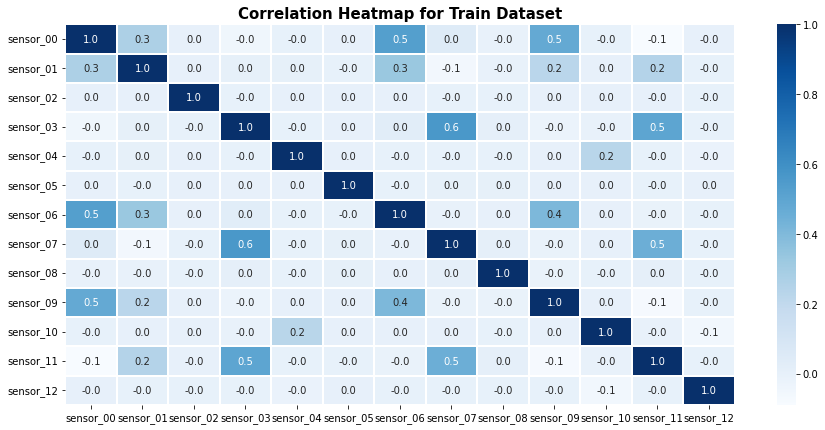

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sensors = [col for col in train.columns if 'sensor_' in col]
plt.figure(figsize=(15, 7))

hm = sns.heatmap(train[sensors].corr(),
                cmap = "Blues",
                annot = True,
                fmt = '.1f',
                linewidths=0.05)

plt.title('Correlation Heatmap for Train Dataset',
         fontsize=15,
         fontweight='bold')

In [10]:
# sensor 0, 1, 6, 9, 3, 7, 11 corr > 0.2

Text(0.5, 1.0, 'Correlation Heatmap for highly correlated columns')

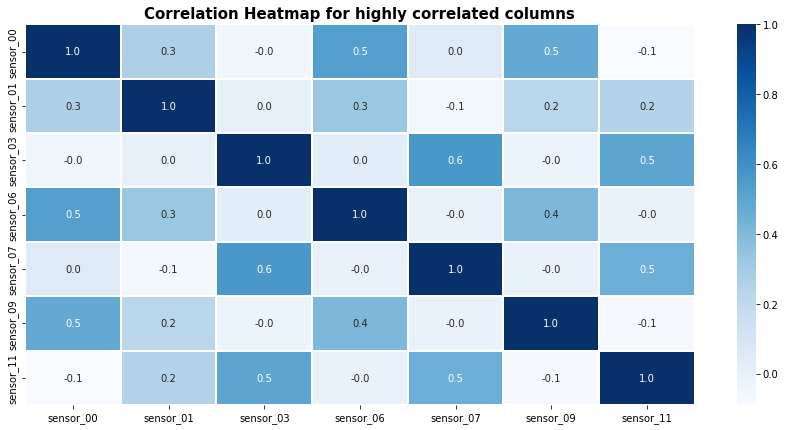

In [11]:
corr_col = ["sensor_00","sensor_01","sensor_03","sensor_06","sensor_07","sensor_09","sensor_11"]
plt.figure(figsize=(15, 7))

hm = sns.heatmap(train[corr_col].corr(),
                cmap = "Blues",
                annot = True,
                fmt = '.1f',
                linewidths=0.05)

plt.title('Correlation Heatmap for highly correlated columns',
         fontsize=15,
         fontweight='bold')

sensor 00 and sensor 6, 9 = 0.5  
sensor 7 and 11 = 0.5  
sensor 3 and 11 = 0.5  
sensor 3 and 7 = 0.6  

corr_col = correlated features (>=0.5)  
sensors = 13 sensors  

In [12]:
# https://www.kaggle.com/code/dmitryuarov/sensors-deep-analysis-0-98/notebook

import plotly as py
import plotly.graph_objs as go
import plotly.express as px

def color(x):
    if x <= 0.25:
        return 0
    elif x >= 0.75:
        return 0.5
    else:
        return 1

sub_stat = labels.merge(train[['sequence', 'subject']], on='sequence', how='left')\
.drop_duplicates().groupby('subject').agg({'state':['mean', 'count']}).reset_index()
sub_stat.columns = sub_stat.columns.map('_'.join)
sub_stat['text'] = 'Subject - <b>' + sub_stat["subject_"].astype('str') + \
'</b> <br>State - <b>' + round(sub_stat["state_mean"], 2).astype('str') + \
'</b> <br>Count - <b>' + sub_stat["state_count"].astype('str') + '</b> <extra></extra>'

fig = go.Figure()
fig.add_trace(go.Scatter( 
    x = sub_stat['subject_'], 
    y = sub_stat['state_mean'],
    mode = 'markers',
    marker=dict(
        size=sub_stat['state_count']*0.3,
        color=((sub_stat['state_mean'].apply(lambda x: color(x)))),
        colorscale=[[0, '#c21b1b'], [0.5, '#21a5de'], [1, '#ffdc2b']],
        line=dict(width=0.1, color='black')
    ),
    hovertemplate = sub_stat['text']
))

fig.update_layout(width = 1150, height=600, plot_bgcolor = 'white', title = 'Subject states', 
                  title_font_size = 27, title_x = 0.5, title_y = 0.9,
                  font_family="Calibri", font_color="black")

fig.update_yaxes(title_text='Mean state', showline = True, linecolor = '#f5f2f2', 
                 showgrid = True, gridwidth = 1, gridcolor = '#f5f2f2',
                 linewidth = 2, tickfont_size = 12, tickvals=[0.0, 0.25, 0.50, 0.75, 1.0])

fig.update_xaxes(title_text='Subject', showline = True, linecolor = '#f5f2f2')
fig.show()

In [13]:
# ubjects, who had more than ~95 sequences, 
# were more likely to get target "1" and 
# subjects, who had less than ~25 sequences, w
# ere more likely to get target "0". 

def sub_imp(x):
    if x < 25:
        return 0
    elif x > 95:
        return 2
    else:
        return 1
    
def engineering(df):
    for sensor in sensors:
        # add lag feature and difference
        df[sensor + '_lag1'] = df.groupby('sequence')[sensor].shift(1)
        df[sensor + '_lag10'] = df.groupby('sequence')[sensor].shift(10)
        # df[sensor + '_back_lag1'] = df.groupby('sequence')[sensor].shift(-1)
        df.fillna(0, inplace=True)
        df[sensor + '_diff1'] = df[sensor] - df[sensor + '_lag1']   
        
    sub_stat = df[['sequence', 'subject']].drop_duplicates().groupby('subject').agg({'sequence': 'count'})\
    .rename(columns={'sequence': 'count'}).reset_index()
    df = df.merge(sub_stat, on='subject', how='left')
    df['sub_imp'] = df['count'].apply(lambda x: sub_imp(x))
    df.drop('count', axis=1, inplace=True)
    
    return df

In [14]:
sensors = [col for col in train.columns if 'sensor_' in col]
train = engineering(train)
test = engineering(test)

In [15]:
#train[['sensor_02', 'sensor_02_lag', 'sensor_02_diff']].head()

In [16]:
groups = train['sequence']
train = train.drop(['sequence', 'subject', 'step'], inplace=False, axis=1).values
test = test.drop(['sequence', 'subject', 'step'], inplace=False, axis=1).values
labels = labels['state']

In [17]:
scaler = StandardScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [18]:
# start
print(train.shape)
print(test.shape)

# reshape dataset as an input of LSTM model
train = train.reshape(int(len(train)/60), 60, train.shape[-1])
test = test.reshape(int(len(test)/60), 60, test.shape[-1])

print(f'train reshape: {train.shape}')
print(f'test reshape: {test.shape}')

(1558080, 53)
(733080, 53)
train reshape: (25968, 60, 53)
test reshape: (12218, 60, 53)


In [19]:
def BuildNN():
    # with tpu_strategy.scope():
    model = keras.models.Sequential([
        keras.layers.Input(shape=(60, train.shape[-1])),
        keras.layers.LSTM(1024, return_sequences=True, name='LSTM_0'),
        keras.layers.LSTM(512, return_sequences=True, name='LSTM_1'),
        keras.layers.LSTM(256, return_sequences=True, name='LSTM_2'),
        keras.layers.LSTM(128, return_sequences=True, name='LSTM_3'),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation="swish"),
        keras.layers.Dense(1, activation="sigmoid")
    ])

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=[keras.metrics.AUC()])
    return model

In [20]:
# tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
# tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

In [21]:
cv_score = 0
test_preds = []
kf = GroupKFold(n_splits=5)

for fold_idx, (train_idx, valid_idx) in enumerate(kf.split(train, labels, groups.unique())):
    # split train and label into X, y train and valid set.
    X_train, X_valid = train[train_idx], train[valid_idx]
    y_train, y_valid = labels.iloc[train_idx].values, labels.iloc[valid_idx].values
    
    # Run the model
    model = BuildNN()
    model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=100, batch_size=256, 
              callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])
    
    # add roc_auc_score of each fold
    score = roc_auc_score(y_valid, model.predict(X_valid).squeeze())
    print(score)
    cv_score += score
    
    # append predictions
    test_preds.append(model.predict(test).squeeze())
    
print(cv_score/5)

2022-04-20 08:58:43.148424: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-20 08:58:43.153394: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-20 08:58:43.154130: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-20 08:58:43.155220: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/100


2022-04-20 08:58:53.743146: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


82/82 [==============================] - 21s 174ms/step - loss: 0.6134 - auc: 0.7215 - val_loss: 0.5242 - val_auc: 0.8232
Epoch 2/100
82/82 [==============================] - 13s 157ms/step - loss: 0.5028 - auc: 0.8342 - val_loss: 0.4779 - val_auc: 0.8603
Epoch 3/100
82/82 [==============================] - 13s 157ms/step - loss: 0.4120 - auc: 0.8917 - val_loss: 0.3856 - val_auc: 0.9079
Epoch 4/100
82/82 [==============================] - 13s 157ms/step - loss: 0.3621 - auc: 0.9181 - val_loss: 0.3882 - val_auc: 0.9170
Epoch 5/100
82/82 [==============================] - 13s 158ms/step - loss: 0.3189 - auc: 0.9373 - val_loss: 0.3429 - val_auc: 0.9320
Epoch 6/100
82/82 [==============================] - 13s 157ms/step - loss: 0.2808 - auc: 0.9517 - val_loss: 0.3455 - val_auc: 0.9346
Epoch 7/100
82/82 [==============================] - 13s 157ms/step - loss: 0.2548 - auc: 0.9604 - val_loss: 0.3104 - val_auc: 0.9466
Epoch 8/100
82/82 [==============================] - 13s 157ms/step - loss

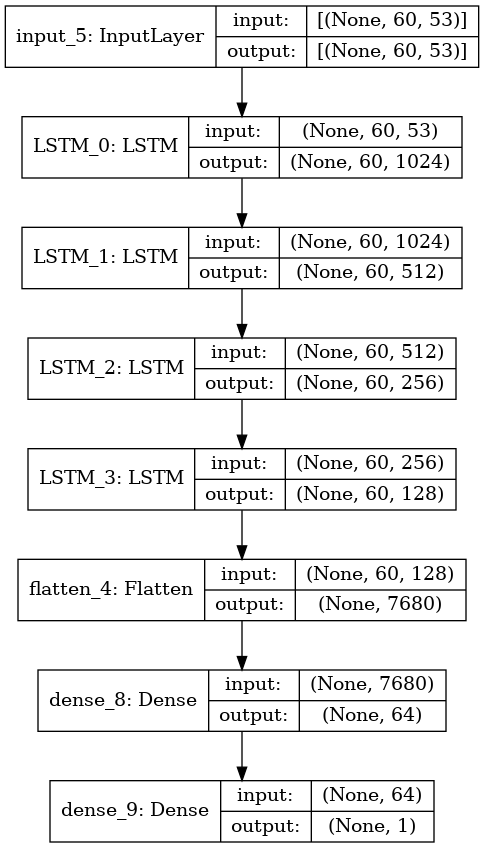

In [22]:
keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [23]:
submission["state"] = sum(test_preds)/5
submission.to_csv("submission.csv", index=False)
submission.head()

,sequence,state
0,25968,0.964885
1,25969,0.991374
2,25970,0.004152
3,25971,0.769182
4,25972,0.754031
